## TODO:
    1- Add more comments to processes and functions
    2- Modify code for more people
    3- Add conclusions to plots

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import glob
import re

#### Read file

In [2]:
df_eeuu_member_of_congress = pd.read_csv('https://raw.githubusercontent.com/alexferrero23/twitter-category-nlp/develop/data/eeuu_member_of_congress.csv', sep=';')

In [3]:
list_senators = df_eeuu_member_of_congress['Twitter'].dropna().tolist()
list_senators = [x.replace('@', '') for x in list_senators]
list_senators = [x.replace(' ', '') for x in list_senators]

In [4]:
df = pd.DataFrame(columns=["id", "user", "username", "created_at", "text", "lang", "label","retweet_count", "favorite_count"])

for user in list_senators:
    try:
        df_user = pd.read_csv(f"https://raw.githubusercontent.com/alexferrero23/twitter-category-nlp/develop/data/{user}.csv", sep="|")
        #user = re.search('data/(.*).csv', path).group(1)
        df_user['username'] = user
        df = pd.concat([df, df_user], ignore_index=True)
    except Exception as e:
        print(e)
        print(f"User {user} was not read")

#df = pd.read_csv(list_data[0], sep="|")
#Only in english
df = df[df['lang']=='en']
print(f"Len of the dataframe: {len(df)}")

Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.

User RepRonKind was not read
HTTP Error 404: Not Found
User SenatorLeahy was not read
Len of the dataframe: 938825


In [5]:
df.head()

,id,user,username,created_at,text,lang,label,retweet_count,favorite_count
0,1506705587903598597,2916086925,RepAdams,Wed Mar 23 18:53:00 +0000 2022,"Madeleine Albright often said, “There is a spe...",en,D,56,196
1,1506279598140633101,2916086925,RepAdams,Tue Mar 22 14:40:16 +0000 2022,Judge Ketanji Brown Jackson:\n\n✔️ Received a ...,en,D,13,26
2,1506012530824531975,2916086925,RepAdams,Mon Mar 21 20:59:02 +0000 2022,When I Grow Up is a virtual forum designed to ...,en,D,5,4
3,1505996638401224708,2916086925,RepAdams,Mon Mar 21 19:55:53 +0000 2022,"Ketanji Brown Jackson's parents, Ellery &amp; ...",en,D,8,31
4,1505906800272490506,2916086925,RepAdams,Mon Mar 21 13:58:54 +0000 2022,Judge Ketanji Brown Jackson is the most qualif...,en,D,19,102


In [6]:
df.label.unique()

array(['D', 'R', 'I'], dtype=object)

In [7]:
df[df['label']=='I'].username.unique()

array(['SenAngusKing', 'SenSanders'], dtype=object)

#### There are two members who are independent, but according to their political career, both will be considered as democrats as both have caucused with the Democratic Party 

In [8]:
df['label'] = df['label'].apply(lambda x: x.replace('I', 'D'))

#### First of all, lets transform twitter date to python datetime

In [9]:
def twitter_date_to_datetime(twitter_date):
    return datetime.strptime(twitter_date,'%a %b %d %H:%M:%S +0000 %Y')

In [10]:
df['created_at'] = df['created_at'].apply(twitter_date_to_datetime)

In [11]:
df.head()

,id,user,username,created_at,text,lang,label,retweet_count,favorite_count
0,1506705587903598597,2916086925,RepAdams,2022-03-23 18:53:00,"Madeleine Albright often said, “There is a spe...",en,D,56,196
1,1506279598140633101,2916086925,RepAdams,2022-03-22 14:40:16,Judge Ketanji Brown Jackson:\n\n✔️ Received a ...,en,D,13,26
2,1506012530824531975,2916086925,RepAdams,2022-03-21 20:59:02,When I Grow Up is a virtual forum designed to ...,en,D,5,4
3,1505996638401224708,2916086925,RepAdams,2022-03-21 19:55:53,"Ketanji Brown Jackson's parents, Ellery &amp; ...",en,D,8,31
4,1505906800272490506,2916086925,RepAdams,2022-03-21 13:58:54,Judge Ketanji Brown Jackson is the most qualif...,en,D,19,102


#### Before anything else, let's remove some useless stuff 

In [12]:
# remove old style retweet text "RT"
def remove_old_style_rt(tweet):
  return(re.sub(r'^RT[\s]+', '', tweet))
# remove hyperlinks
def remove_hyperlinks(tweet):
  return(re.sub(r'https?:\/\/.*[\r\n]*', '', tweet))
# remove hashtag sign
def remove_hashtag_sign(tweet):
  return(re.sub(r'#', '', tweet))
# remove skip line
def remove_skip_line(tweet):
  return(re.sub(r'\n', '', tweet))

In [13]:
df['text'] = df['text'].apply(remove_old_style_rt)
df['text'] = df['text'].apply(remove_hyperlinks)
df['text'] = df['text'].apply(remove_hashtag_sign)
df['text'] = df['text'].apply(remove_skip_line)

#### Now let's check out the length of tweets

In [14]:
df['length'] = df['text'].apply(lambda x: len(x))

In [15]:
df.head()

,id,user,username,created_at,text,lang,label,retweet_count,favorite_count,length
0,1506705587903598597,2916086925,RepAdams,2022-03-23 18:53:00,"Madeleine Albright often said, “There is a spe...",en,D,56,196,117
1,1506279598140633101,2916086925,RepAdams,2022-03-22 14:40:16,Judge Ketanji Brown Jackson:✔️ Received a unan...,en,D,13,26,115
2,1506012530824531975,2916086925,RepAdams,2022-03-21 20:59:02,When I Grow Up is a virtual forum designed to ...,en,D,5,4,117
3,1505996638401224708,2916086925,RepAdams,2022-03-21 19:55:53,"Ketanji Brown Jackson's parents, Ellery &amp; ...",en,D,8,31,120
4,1505906800272490506,2916086925,RepAdams,2022-03-21 13:58:54,Judge Ketanji Brown Jackson is the most qualif...,en,D,19,102,117


In [16]:
df_democrats = df[df['label']=='D']
df_republicans = df[df['label']=='R']
print(f"There are {len(df_republicans)} tweets of {df_republicans.username.nunique()} republican users\
 and {len(df_democrats)} tweets of {df_democrats.username.nunique()} democrat users")

There are 417865 tweets of 250 republican users and 520960 tweets of 270 democrat users


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


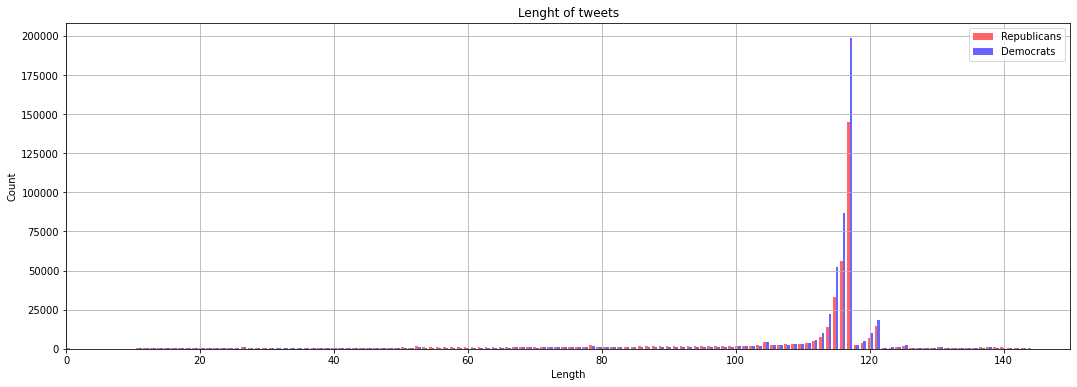

In [17]:
plt.rcParams['figure.figsize'] = (18, 6)
bins = 150
plt.title('Lenght of tweets')
plt.hist([df_republicans['length'], df_democrats['length']], alpha = 0.6, bins=bins, 
         label=['Republicans', 'Democrats'], color = ['r','b'])
plt.xlabel('Length');
plt.ylabel('Count');
plt.legend(loc='upper right');
plt.xlim(0,150);
plt.grid();
plt.show();

#### Characters in tweets

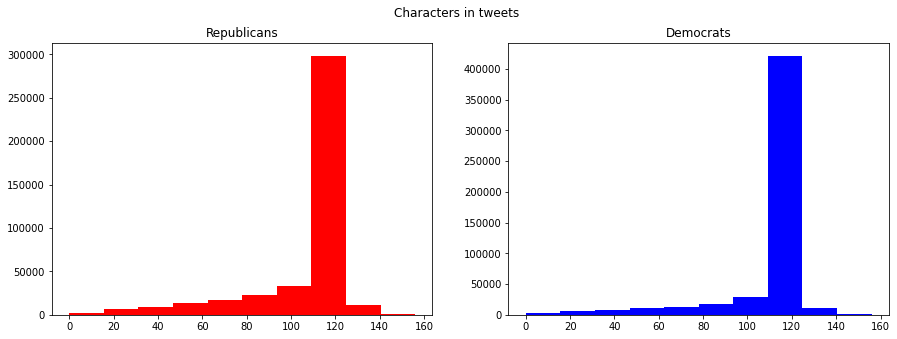

In [18]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
tweet_len_r=df_republicans['text'].str.len()
ax1.hist(tweet_len_r, color='r')
ax1.set_title('Republicans')
tweet_len_d=df_democrats['text'].str.len()
ax2.hist(tweet_len_d, color='b')
ax2.set_title('Democrats')
fig.suptitle('Characters in tweets')
plt.show()

#### Temporal distribution of tweets by month

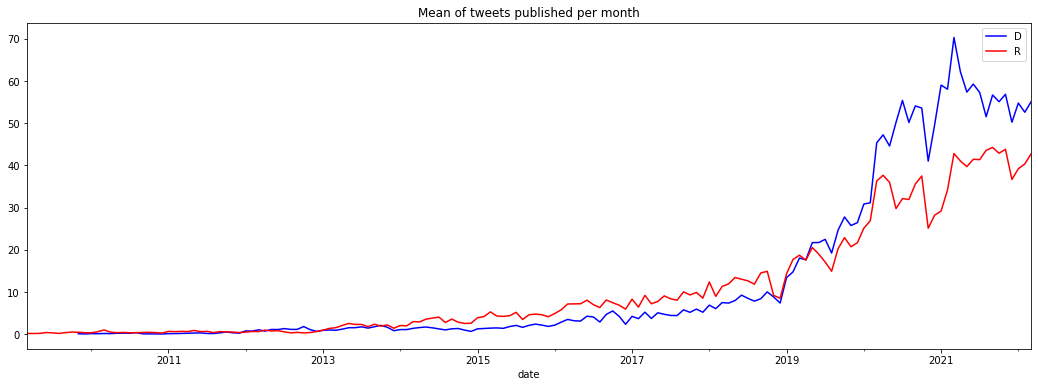

In [19]:
fig, ax = plt.subplots(figsize=(18, 6))

for label in df.label.unique():
    df_temp = df[df['label'] == label].copy()
    df_temp['date'] = pd.to_datetime(df_temp['created_at'].dt.strftime('%m/%Y'))
    number_users = df_temp.username.nunique()
    df_temp = df_temp.groupby(df_temp['date']).size()
    #Standarize by number of users
    df_temp = df_temp.divide(other = number_users)
    color = 'r' if label == 'R' else 'b'
    df_temp.plot(label=label, ax=ax, color=color)

ax.set_title('Mean of tweets published per month')
ax.legend();

#### Number of words in tweets

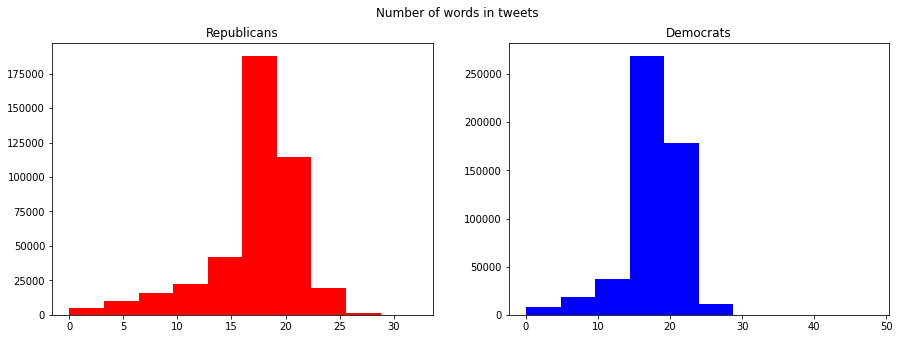

In [20]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
tweet_len_r=df_republicans['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len_r, color='r')
ax1.set_title('Republicans')
tweet_len_d=df_democrats['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len_d, color='b')
ax2.set_title('Democrats')
fig.suptitle('Number of words in tweets')
plt.show()

#### Average word lenght in tweets

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py

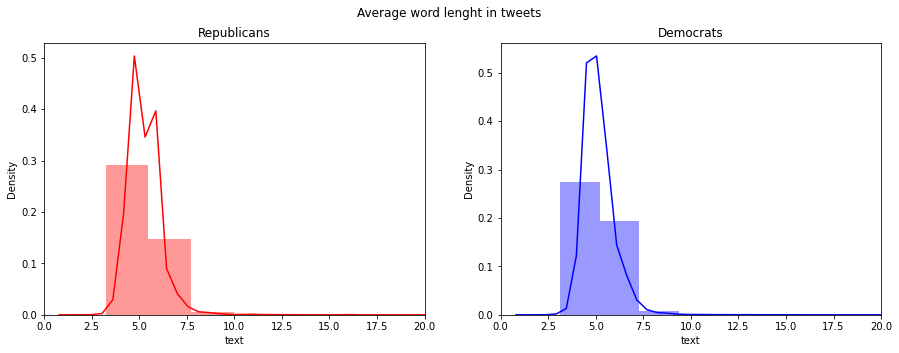

In [22]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
word=df_republicans['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='r')
ax1.set_title('Republicans')
ax1.set(xlim=(0, 20))
word=df_democrats['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='b')
ax2.set_title('Democrats')
ax2.set(xlim=(0, 20))
fig.suptitle('Average word lenght in tweets');

In [23]:
def create_list_of_words(label):
    list_of_words=[]
    
    for x in df[df['label']==label]['text'].str.split():
        for i in x:
            list_of_words.append(i)
    return list_of_words

In [26]:
from nltk.tokenize import TweetTokenizer

def create_corpus(label):
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    corpus = []
    for x in df[df['label']==label]['text']:
        corpus += tokenizer.tokenize(x)
    return corpus

In [27]:
create_corpus(label='R')[:20]

['i',
 'have',
 'joined',
 'my',
 'fellow',
 'co-chairs',
 'of',
 'the',
 'congressional',
 'coalition',
 'on',
 'adoption',
 'in',
 'penning',
 'a',
 'letter',
 'to',
 'u',
 '.',
 's']

In [ ]:
create_list_of_words(label='R')[:20]

['I',
 'have',
 'joined',
 'my',
 'fellow',
 'co-chairs',
 'of',
 'the',
 'Congressional',
 'Coalition',
 'on',
 'Adoption',
 'in',
 'penning',
 'a',
 'letter',
 'to',
 'U.S.',
 'Secretary…',
 'Today']

#### Punctuation and strange characters in tweets

In [32]:
import string

plt.figure(figsize=(18,6))
list_of_words = create_corpus(label='R') + create_corpus(label='D')

punctuation = string.punctuation
special_characters = []

for word in list_of_words:
    if word in punctuation:
        special_characters.append(word)
        
special_characters_df = pd.DataFrame(special_characters, columns=['char'])
special_characters_df.groupby('char').size().reset_index(name='count').sort_values(by='count', ascending=False)

#dict_count_characters = {i:special_characters.count(i) for i in special_characters}
#dict_count_characters_ordered = sorted(dict_count_characters.items(), key=lambda x: x[1], reverse=True)

#characters = [i[0] for i in dict_count_characters_ordered]
#count = [i[1] for i in dict_count_characters_ordered]

#sns.barplot(x=count,y=characters);

,char,count
12,.,624258
10,",",517749
0,!,127523
4,&,95085
15,:,91415
11,-,54638
1,"""",30694
2,$,27110
20,?,25474
5,',20130


<Figure size 1296x432 with 0 Axes>

#### Most common words in tweets

In [ ]:
from collections import Counter

list_of_words_republicans = create_list_of_words(label='R')
list_of_words_democrats = create_list_of_words(label='D')
top_used_words_republicans = dict(Counter(list_of_words_republicans))
top_used_words_democrats = dict(Counter(list_of_words_democrats))
top_used_words_ordered_republicans = sorted(top_used_words_republicans.items(), key=lambda x: x[1], reverse=True)
top_used_words_ordered_democrats = sorted(top_used_words_democrats.items(), key=lambda x: x[1], reverse=True)
top_used_words_ordered_republicans[:5]

[('the', 309931),
 ('to', 278060),
 ('of', 145699),
 ('and', 136834),
 ('in', 118708)]

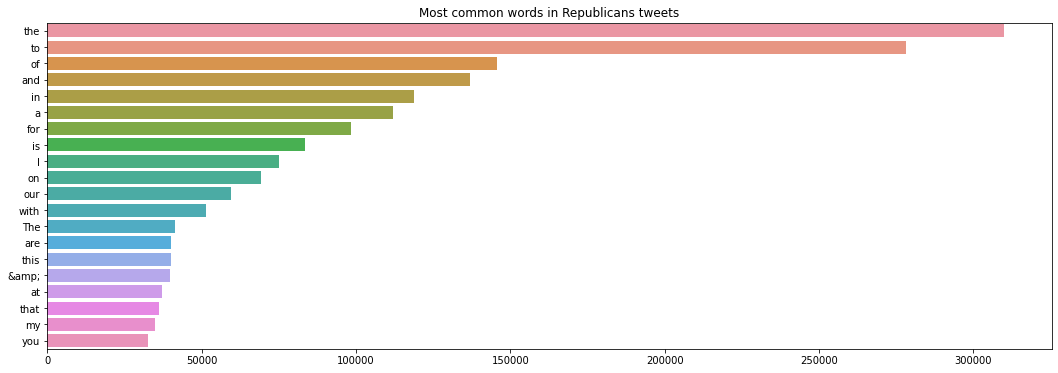

In [ ]:
words = [i[0] for i in top_used_words_ordered_republicans[:20]]
count = [i[1] for i in top_used_words_ordered_republicans[:20]]
sns.barplot(x=count,y=words).set_title('Most common words in Republicans tweets');

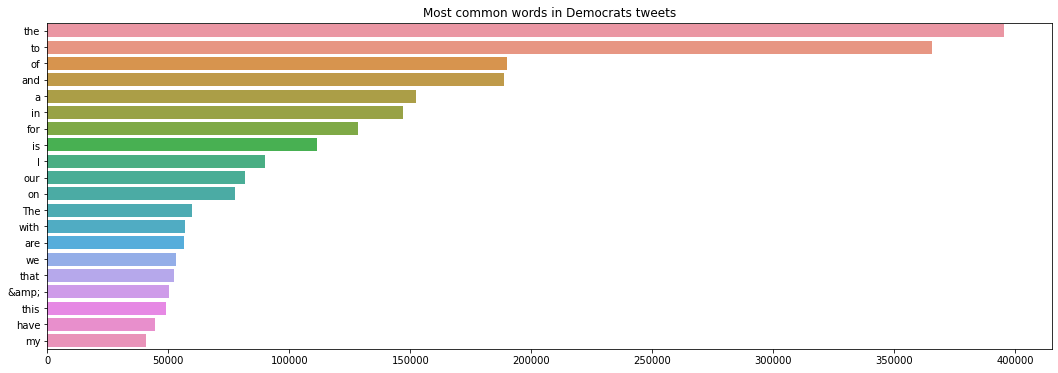

In [ ]:
words = [i[0] for i in top_used_words_ordered_democrats[:20]]
count = [i[1] for i in top_used_words_ordered_democrats[:20]]
sns.barplot(x=count,y=words).set_title('Most common words in Democrats tweets');

# work in progress


In [ ]:
#tokenizacion
import nltk
nltk.download('punkt')
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
print(df['text'][0])
tweet_tokens = tokenizer.tokenize(df['text'][0])
print(tweet_tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Madeleine Albright often said, “There is a special place in hell for women who don't help each other.” As a feminis… 
['madeleine', 'albright', 'often', 'said', ',', '“', 'there', 'is', 'a', 'special', 'place', 'in', 'hell', 'for', 'women', 'who', "don't", 'help', 'each', 'other', '.', '”', 'as', 'a', 'feminis', '…']


In [ ]:
tweets_clean = []
for word in tokenizer.tokenize(df['text'][1]): # Go through every word in your tokens list
    if (word not in stop and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)
print(tweets_clean)

['Judge', 'Ketanji', 'Brown', 'Jackson', '✔️', 'Received', 'unanimous', '``', 'Well', 'Qualified', "''", 'rating', 'nonpartisan', 'American', 'Bar', 'Ass…']


In [ ]:
#nomalizacion

text = " ".join(tweets_clean)
tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)
stemmer = nltk.stem.PorterStemmer()
" ".join(stemmer.stem(token) for token in tokens)

"judg ketanji brown jackson ✔️ receiv unanim `` well qualifi '' rate nonpartisan american bar ass…"

#### Most common words in tweets which are not stop words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


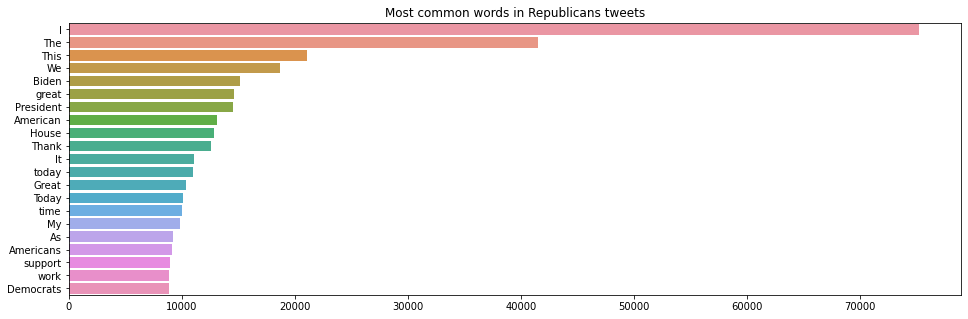

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop=set(stopwords.words('english'))
import string


words = []
count = []
list_of_rubish = ['&amp;', '-']
for word, number in top_used_words_ordered_republicans:
    if len(words) > 20:
        break
    elif (word not in stop) and (word not in list_of_rubish) and (word not in string.punctuation):
        words.append(word)
        count.append(number)

plt.figure(figsize=(16,5))
sns.barplot(x=count,y=words).set_title('Most common words in Republicans tweets');

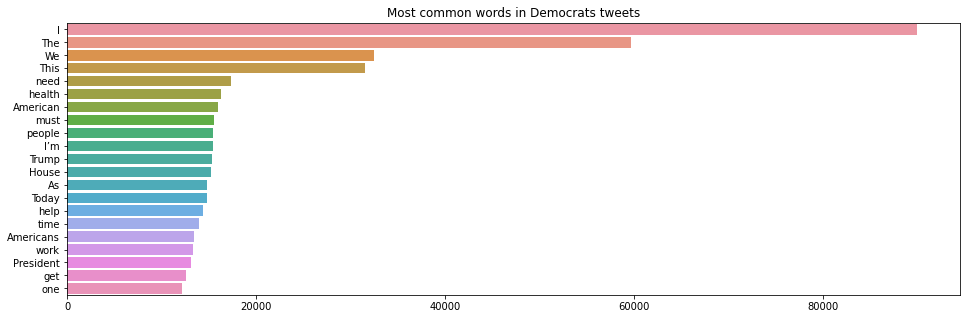

In [ ]:
words = []
count = []
for word, number in top_used_words_ordered_democrats:
    if len(words) > 20:
        break
    elif (word not in stop) and (word not in list_of_rubish) and (word not in string.punctuation):
        words.append(word)
        count.append(number)

plt.figure(figsize=(16,5))
sns.barplot(x=count,y=words).set_title('Most common words in Democrats tweets');

#### Most common pairs of words in tweets

In [ ]:
def create_list_of_bigrams(label):
    list_of_bigrams=[]
    
    for x in df[df['label']==label]['text'].str.split():
        for i in range(len(x)-1):
            list_of_bigrams.append(tuple(x[i:i+2]))
    return list_of_bigrams

In [ ]:
list_of_bigrams_republicans = create_list_of_bigrams(label='R')
list_of_bigrams_democrats = create_list_of_bigrams(label='D')

In [ ]:
top_used_bigrams_republicans = dict(Counter(list_of_bigrams_republicans))
top_used_bigrams_democrats = dict(Counter(list_of_bigrams_democrats))
top_used_bigrams_ordered_republicans = sorted(top_used_bigrams_republicans.items(), key=lambda x: x[1], reverse=True)
top_used_bigrams_ordered_democrats = sorted(top_used_bigrams_democrats.items(), key=lambda x: x[1], reverse=True)
top_used_bigrams_ordered_republicans[:5]

[(('of', 'the'), 31504),
 (('to', 'the'), 19856),
 (('in', 'the'), 19267),
 (('on', 'the'), 16828),
 (('for', 'the'), 15255)]

In [ ]:
#transform the bigrams from tuple to string
for i in range(len(top_used_bigrams_ordered_republicans)):
    top_used_bigrams_ordered_republicans[i] = (" ".join(top_used_bigrams_ordered_republicans[i][0]), top_used_bigrams_ordered_republicans[i][1])
for i in range(len(top_used_bigrams_ordered_democrats)):
    top_used_bigrams_ordered_democrats[i] = (" ".join(top_used_bigrams_ordered_democrats[i][0]), top_used_bigrams_ordered_democrats[i][1])

In [ ]:
top_used_bigrams_ordered_republicans[:20]

[('of the', 31504),
 ('to the', 19856),
 ('in the', 19267),
 ('on the', 16828),
 ('for the', 15255),
 ('at the', 11189),
 ('Thank you', 10712),
 ('is a', 10636),
 ('to be', 9164),
 ('I am', 8434),
 ('and the', 7483),
 ('with the', 6962),
 ('of our', 6887),
 ('to see', 6826),
 ('to discuss', 6766),
 ('This is', 6410),
 ('you to', 6281),
 ('will be', 5960),
 ('and I', 5822),
 ('the House', 5670)]

Text(0.5, 1.0, 'Most common pairs of words in Republicans tweets')

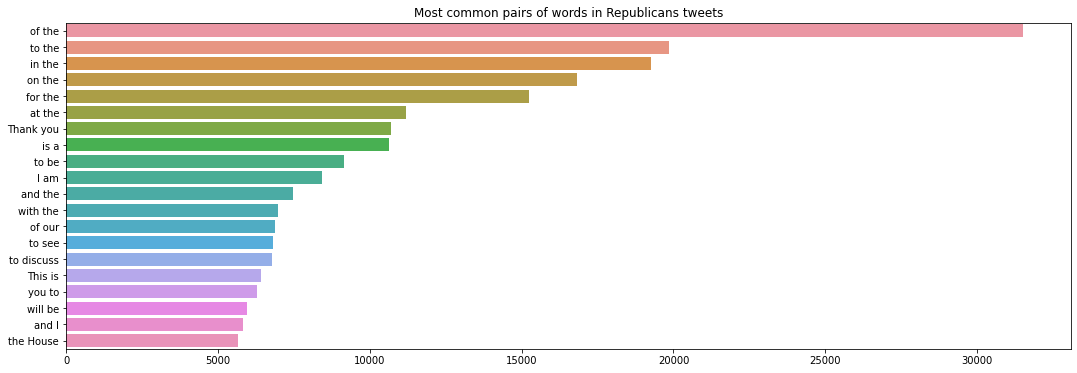

In [ ]:
x,y=map(list,zip(*top_used_bigrams_ordered_republicans[:20]))
sns.barplot(x=y,y=x).set_title('Most common pairs of words in Republicans tweets')

Text(0.5, 1.0, 'Most common pairs of words in Democrats tweets')

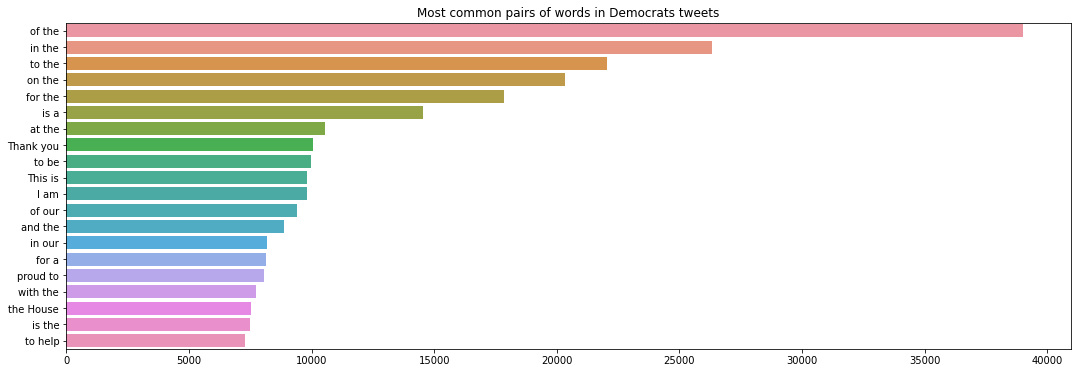

In [ ]:
x,y=map(list,zip(*top_used_bigrams_ordered_democrats[:20]))
sns.barplot(x=y,y=x).set_title('Most common pairs of words in Democrats tweets')

#### I suspect that there are gonna be URLs

In [ ]:
len(df.query('text.str.contains("http")', engine='python'))

4

# WE HAVE TO CLEAN EVERYTHING, THIS IS FULL OF SHIT